## Boston Gender with Python!!! 

In [1]:
import pandas as pd
import numpy as np
import csv

import matplotlib.pyplot as plt

In [2]:
#import the csv i downloaded from the website with the names -- could robotize this later..
# they have an API https://data.cityofboston.gov/Finance/Employee-Earnings-Report-2015/ah28-sywy

pay_2014 = pd.read_csv("Employee_Earnings_Report_2014.csv")


In [3]:

pay_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22233 entries, 0 to 22232
Data columns (total 12 columns):
NAME               22233 non-null object
TITLE              22233 non-null object
DEPARTMENT NAME    22233 non-null object
REGULAR            22233 non-null object
RETRO              22233 non-null object
OTHER              22233 non-null object
OVERTIME           22233 non-null object
INJURED            22233 non-null object
DETAIL             22233 non-null object
QUINN              22233 non-null object
TOTAL EARNINGS     22233 non-null object
ZIP                22231 non-null object
dtypes: object(12)
memory usage: 2.0+ MB


In [4]:

pay_2014.head(10)

,NAME,TITLE,DEPARTMENT NAME,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN,TOTAL EARNINGS,ZIP
0,"Adario,Anthony J",Supvising Claims Agent (Asd),ASD Human Resources,$98538.32,$0.00,$1842.87,$0.00,$0.00,$0.00,$0.00,$100381.19,02132
1,"Baker,Katherine E.",Nurse Case Manager,ASD Human Resources,$83942.21,$0.00,$225.00,$0.00,$0.00,$0.00,$0.00,$84167.21,02136
2,"Braga,Ann Hess",HumanResourcesComplianceOffcr,ASD Human Resources,$98538.34,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$98538.34,02126
3,"Calobrisi,Jane Ellen",Personnel Analyst,ASD Human Resources,$70073.81,$0.00,$225.00,$0.00,$0.00,$0.00,$0.00,$70298.81,02090
4,"Castillo-Cook,Wendolyn M.",Alcholism Coord I,ASD Human Resources,$79253.11,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$79253.11,02121
5,"Curran,Liam Patrick",Asst Corp Counsel III,ASD Human Resources,$69266.69,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$69266.69,02122
6,"De Jesus,Winnie Yam",Affirm Action Monitor,ASD Human Resources,$42061.21,$0.00,$487.21,$0.00,$0.00,$0.00,$0.00,$42548.42,02458
7,"Donnelly,Jennifer P.",Prin Clerk,ASD Human Resources,$44080.61,$0.00,$300.00,$0.00,$0.00,$0.00,$0.00,$44380.61,02129
8,"Donovan,Carol Anne",Prin Admin Analyst,ASD Human Resources,$73547.25,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$73547.25,02127
9,"Donovan,John J",Exec Asst (EAP/OHR),ASD Human Resources,$15019.39,$0.00,$10250.05,$0.00,$0.00,$0.00,$0.00,$25269.44,02132


what would I like to do now? for the graphic, I need to genderize, and then pick the top 100 people by pay.
the genderizer uses first name,so I need to make a column of first names..Ill start with the 2016 data set and aim to have this done soon to update my graphic...
...Ill have to experiment a bit with the genderizer so will pull out 20 names to test them..

In [5]:
d_2014 = pay_2014

d_2014.head()

,NAME,TITLE,DEPARTMENT NAME,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN,TOTAL EARNINGS,ZIP
0,"Adario,Anthony J",Supvising Claims Agent (Asd),ASD Human Resources,$98538.32,$0.00,$1842.87,$0.00,$0.00,$0.00,$0.00,$100381.19,02132
1,"Baker,Katherine E.",Nurse Case Manager,ASD Human Resources,$83942.21,$0.00,$225.00,$0.00,$0.00,$0.00,$0.00,$84167.21,02136
2,"Braga,Ann Hess",HumanResourcesComplianceOffcr,ASD Human Resources,$98538.34,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$98538.34,02126
3,"Calobrisi,Jane Ellen",Personnel Analyst,ASD Human Resources,$70073.81,$0.00,$225.00,$0.00,$0.00,$0.00,$0.00,$70298.81,02090
4,"Castillo-Cook,Wendolyn M.",Alcholism Coord I,ASD Human Resources,$79253.11,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$79253.11,02121


In [6]:

d_2014['REGULAR'] = (d_2014['REGULAR'].replace( '[\$,)]','', regex=True ).astype(float)).round()
d_2014['RETRO'] = (d_2014['RETRO'].replace( '[\$,)]','', regex=True ).astype(float)).round()
d_2014['OTHER'] = (d_2014['OTHER'].replace( '[\$,)]','', regex=True ).astype(float)).round()
d_2014['OVERTIME'] = (d_2014['OVERTIME'].replace( '[\$,)]','', regex=True ).astype(float)).round()
d_2014['INJURED'] = (d_2014['INJURED'].replace( '[\$,)]','', regex=True ).astype(float)).round()
#in 2015 its detailS vs 2014,2016 detail 
d_2014['DETAIL'] = (d_2014['DETAIL'].replace( '[\$,)]','', regex=True ).astype(float)).round()
#2014 its just Quinn, not quinn/edu has in 2015 2016
d_2014['QUINN'] = (d_2014['QUINN'].replace( '[\$,)]','', regex=True ).astype(float)).round()
d_2014['TOTAL EARNINGS'] = (d_2014['TOTAL EARNINGS'].replace( '[\$,)]','', regex=True ).astype(float)).round()


d_2014.head()

d_2014 = d_2014.rename(columns = {
'REGULAR':"salary",
'RETRO':"retroactive",
'OTHER':'other',
'OVERTIME':'overtime',
'DETAIL':'detail',
'INJURED':'injured',
'QUINN/EDUCATION INCENTIVE':'quinn_education_incentive',
'TOTAL EARNINGS':'totalSalary',
'NAME':'name',
"DEPARTMENT_NAME" : "dept",
"TITLE" : "title",
"POSTAL" : "zip_code",
    
    
})
d_2014.head()


#the csv used for d3(v3) jsI want to update has this: columns are name, 
#firstName, dept, salary, totalSalary(still has $), gender -- is just F or M 




,name,title,DEPARTMENT NAME,salary,retroactive,other,overtime,injured,detail,QUINN,totalSalary,ZIP
0,"Adario,Anthony J",Supvising Claims Agent (Asd),ASD Human Resources,98538.0,0.0,1843.0,0.0,0.0,0.0,0.0,100381.0,02132
1,"Baker,Katherine E.",Nurse Case Manager,ASD Human Resources,83942.0,0.0,225.0,0.0,0.0,0.0,0.0,84167.0,02136
2,"Braga,Ann Hess",HumanResourcesComplianceOffcr,ASD Human Resources,98538.0,0.0,0.0,0.0,0.0,0.0,0.0,98538.0,02126
3,"Calobrisi,Jane Ellen",Personnel Analyst,ASD Human Resources,70074.0,0.0,225.0,0.0,0.0,0.0,0.0,70299.0,02090
4,"Castillo-Cook,Wendolyn M.",Alcholism Coord I,ASD Human Resources,79253.0,0.0,0.0,0.0,0.0,0.0,0.0,79253.0,02121


In [7]:
#the csv used for d3(v3) jsI want to update has this: columns are name, 
#firstName, dept, salary, totalSalary(still has $), gender -- is just F or M 

here i want to sort on the salary and then cut off at the first 200 to not use too much of teh API right now..$9 dolalrs!!!! 

In [8]:
#sort on salaries 
d_2014 = d_2014.sort_values('salary', ascending=False)


had to do the splitting off of first name in two steps that probably should be one so can review later..below might help

#see this
#https://stackoverflow.com/questions/29585106/pandas-how-to-split-twice-a-given-field
 #try this:
trimmed_list = [i.replace('.', ',').split(',') for i in sbj[0].tolist() if i != ""]
item_list = [item.strip(whitespace) for item in itertools.chain(*trimmed_list)]
item_count = Counter(item_list)


In [9]:
d_2014['firstName'] = d_2014.name.apply(lambda x: x.split(',')[1])
d_2014.head(5)

,name,title,DEPARTMENT NAME,salary,retroactive,other,overtime,injured,detail,QUINN,totalSalary,ZIP,firstName
16227,"McDonough,John P",Superintendent,Superintendent,254358.0,0.0,4808.0,0.0,0.0,0.0,0.0,259165.0,02129,John P
18127,"Evans,William B",Commissioner (Bpd),Boston Police Department,186204.0,0.0,0.0,0.0,0.0,0.0,0.0,186204.0,02127,William B
21932,"Ruggere,Michael J",Dep Fire Chief,Boston Fire Department,183196.0,20912.0,4566.0,33749.0,0.0,0.0,0.0,242423.0,02188,Michael J
21103,"Granara,David Richard",DepFireChiefAdmn-AdvTechnician,Boston Fire Department,183087.0,20929.0,10758.0,0.0,0.0,0.0,0.0,214774.0,02128,David Richard
21171,"Hasson,John",Dep Fire Chief Administration,Boston Fire Department,182485.0,0.0,17379.0,0.0,602.0,0.0,0.0,200466.0,02125,John


In [10]:
d_2014['firstName'] = d_2014.firstName.apply(lambda x: x.split(' ')[0])
d_2014.head(5)



,name,title,DEPARTMENT NAME,salary,retroactive,other,overtime,injured,detail,QUINN,totalSalary,ZIP,firstName
16227,"McDonough,John P",Superintendent,Superintendent,254358.0,0.0,4808.0,0.0,0.0,0.0,0.0,259165.0,02129,John
18127,"Evans,William B",Commissioner (Bpd),Boston Police Department,186204.0,0.0,0.0,0.0,0.0,0.0,0.0,186204.0,02127,William
21932,"Ruggere,Michael J",Dep Fire Chief,Boston Fire Department,183196.0,20912.0,4566.0,33749.0,0.0,0.0,0.0,242423.0,02188,Michael
21103,"Granara,David Richard",DepFireChiefAdmn-AdvTechnician,Boston Fire Department,183087.0,20929.0,10758.0,0.0,0.0,0.0,0.0,214774.0,02128,David
21171,"Hasson,John",Dep Fire Chief Administration,Boston Fire Department,182485.0,0.0,17379.0,0.0,602.0,0.0,0.0,200466.0,02125,John


In [11]:
#make a shorter df so as to not genderize so many -- ill do 500
d_2014_top_500 = d_2014.head(500)

In [12]:
d_2014_top_500.tail()

,name,title,DEPARTMENT NAME,salary,retroactive,other,overtime,injured,detail,QUINN,totalSalary,ZIP,firstName
21042,"Freeman,Clydies",Fire Lieutenant,Boston Fire Department,115053.0,15464.0,2457.0,20874.0,205.0,5668.0,0.0,159720.0,02119,Clydies
20777,"Curley,Kevin J",Fire Lieutenant,Boston Fire Department,115025.0,15190.0,4600.0,11037.0,175.0,148.0,0.0,146175.0,02186,Kevin
13609,"Dias,Lucyann",Special Assistant (C),Chief Financial Officer,115001.0,0.0,0.0,0.0,0.0,0.0,0.0,115001.0,02571,Lucyann
7463,"Chambers,Brian R",Sen Program Director,BPS Facility Mgmt/A & R,115001.0,0.0,0.0,0.0,0.0,0.0,0.0,115001.0,02132,Brian
5261,"Webb,Cynthia",Asst Headmaster,BPS Boston Latin,114967.0,100.0,125.0,0.0,0.0,0.0,0.0,115192.0,02149,Cynthia


create a column called gender

In [13]:
#genderize using my API key , $9!!!!!
from genderize import Genderize
genderize = Genderize(
    user_agent='GenderizeDocs/0.0',
    api_key='08402238f4c2af82034ed0a16e4d36cb')

In [14]:
#df2['gender_try2'] = genderize.get(df2['name'],country_id='US')
d_2014_top_500['genderize_results'] = genderize.get(d_2014_top_500['firstName'],country_id='US')

/Users/hw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
d_2014_top_500.head(5)

,name,title,DEPARTMENT NAME,salary,retroactive,other,overtime,injured,detail,QUINN,totalSalary,ZIP,firstName,genderize_results
16227,"McDonough,John P",Superintendent,Superintendent,254358.0,0.0,4808.0,0.0,0.0,0.0,0.0,259165.0,02129,John,"{'name': 'John', 'gender': 'male', 'probabilit..."
18127,"Evans,William B",Commissioner (Bpd),Boston Police Department,186204.0,0.0,0.0,0.0,0.0,0.0,0.0,186204.0,02127,William,"{'name': 'William', 'gender': 'male', 'probabi..."
21932,"Ruggere,Michael J",Dep Fire Chief,Boston Fire Department,183196.0,20912.0,4566.0,33749.0,0.0,0.0,0.0,242423.0,02188,Michael,"{'name': 'Michael', 'gender': 'male', 'probabi..."
21103,"Granara,David Richard",DepFireChiefAdmn-AdvTechnician,Boston Fire Department,183087.0,20929.0,10758.0,0.0,0.0,0.0,0.0,214774.0,02128,David,"{'name': 'David', 'gender': 'male', 'probabili..."
21171,"Hasson,John",Dep Fire Chief Administration,Boston Fire Department,182485.0,0.0,17379.0,0.0,602.0,0.0,0.0,200466.0,02125,John,"{'name': 'John', 'gender': 'male', 'probabilit..."


grab the gender only from the genderize column and add it as a column

change the order of the columns


In [17]:
gender1 = []

for item in d_2014_top_500['genderize_results']:
    gender_id = item['gender']
    gender1.append(gender_id)
    
d_2014_top_500["gender"] = gender1
d_2014_top_500.head(4)

/Users/hw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,name,title,DEPARTMENT NAME,salary,retroactive,other,overtime,injured,detail,QUINN,totalSalary,ZIP,firstName,genderize_results,gender
16227,"McDonough,John P",Superintendent,Superintendent,254358.0,0.0,4808.0,0.0,0.0,0.0,0.0,259165.0,02129,John,"{'name': 'John', 'gender': 'male', 'probabilit...",male
18127,"Evans,William B",Commissioner (Bpd),Boston Police Department,186204.0,0.0,0.0,0.0,0.0,0.0,0.0,186204.0,02127,William,"{'name': 'William', 'gender': 'male', 'probabi...",male
21932,"Ruggere,Michael J",Dep Fire Chief,Boston Fire Department,183196.0,20912.0,4566.0,33749.0,0.0,0.0,0.0,242423.0,02188,Michael,"{'name': 'Michael', 'gender': 'male', 'probabi...",male
21103,"Granara,David Richard",DepFireChiefAdmn-AdvTechnician,Boston Fire Department,183087.0,20929.0,10758.0,0.0,0.0,0.0,0.0,214774.0,02128,David,"{'name': 'David', 'gender': 'male', 'probabili...",male


In [18]:
cols = list(d_2014_top_500.columns.values)
cols

['name',
 'title',
 'DEPARTMENT NAME',
 'salary',
 'retroactive',
 'other',
 'overtime',
 'injured',
 'detail',
 'QUINN',
 'totalSalary',
 'ZIP',
 'firstName',
 'genderize_results',
 'gender']

In [19]:
#only for 2014 since 2015-2017 sheets have it taken care of in one cell above
d_2014_top_500 = d_2014_top_500.rename(columns = {

'QUINN':'quinn_education_incentive',
'DEPARTMENT NAME':'dept',
'ZIP':'zip_code',
    
    
})



In [20]:
cols = list(d_2014_top_500.columns.values)
cols

['name',
 'title',
 'dept',
 'salary',
 'retroactive',
 'other',
 'overtime',
 'injured',
 'detail',
 'quinn_education_incentive',
 'totalSalary',
 'zip_code',
 'firstName',
 'genderize_results',
 'gender']

In [21]:
#only for 2014 since 2015-2017 sheets have it taken care of in one cell above
d_2014 = d_2014.rename(columns = {

'QUINN':'quinn_education_incentive',
'DEPARTMENT NAME':'dept',
'ZIP':'zip_code',
    
    
})



In [22]:
d_2014_top_500 = d_2014_top_500[[
 'name',
'firstName',
 'gender',
 'salary',
'totalSalary',
'dept',
 'title',
'genderize_results',
 'retroactive',
 'other',
 'overtime',
 'injured',
 'detail',
 'quinn_education_incentive',
 'zip_code', 
 ]]
d_2014_top_500.head()

,name,firstName,gender,salary,totalSalary,dept,title,genderize_results,retroactive,other,overtime,injured,detail,quinn_education_incentive,zip_code
16227,"McDonough,John P",John,male,254358.0,259165.0,Superintendent,Superintendent,"{'name': 'John', 'gender': 'male', 'probabilit...",0.0,4808.0,0.0,0.0,0.0,0.0,02129
18127,"Evans,William B",William,male,186204.0,186204.0,Boston Police Department,Commissioner (Bpd),"{'name': 'William', 'gender': 'male', 'probabi...",0.0,0.0,0.0,0.0,0.0,0.0,02127
21932,"Ruggere,Michael J",Michael,male,183196.0,242423.0,Boston Fire Department,Dep Fire Chief,"{'name': 'Michael', 'gender': 'male', 'probabi...",20912.0,4566.0,33749.0,0.0,0.0,0.0,02188
21103,"Granara,David Richard",David,male,183087.0,214774.0,Boston Fire Department,DepFireChiefAdmn-AdvTechnician,"{'name': 'David', 'gender': 'male', 'probabili...",20929.0,10758.0,0.0,0.0,0.0,0.0,02128
21171,"Hasson,John",John,male,182485.0,200466.0,Boston Fire Department,Dep Fire Chief Administration,"{'name': 'John', 'gender': 'male', 'probabilit...",0.0,17379.0,0.0,602.0,0.0,0.0,02125


now I'd like to see how many there are of each type in the new gender column...

In [23]:
d_2014_top_500['gender'].value_counts() 

male      343
female    142
Name: gender, dtype: int64

SO 485 GOT COUNTED OUT OF 500 

In [24]:
d_2014_top_500.count() 

name                         500
firstName                    500
gender                       485
salary                       500
totalSalary                  500
dept                         500
title                        500
genderize_results            500
retroactive                  500
other                        500
overtime                     500
injured                      500
detail                       500
quinn_education_incentive    500
zip_code                     500
dtype: int64

In [25]:
#this is a repeat from earlier but can't hurt 
#salarySorted = d_2015_top_500.sort_values(by='salary', ascending=False)
#salarySorted.head()

d_2014_top_500 = d_2014_top_500.sort_values(by='salary', ascending=False)

d_2014_top_500.head()

,name,firstName,gender,salary,totalSalary,dept,title,genderize_results,retroactive,other,overtime,injured,detail,quinn_education_incentive,zip_code
16227,"McDonough,John P",John,male,254358.0,259165.0,Superintendent,Superintendent,"{'name': 'John', 'gender': 'male', 'probabilit...",0.0,4808.0,0.0,0.0,0.0,0.0,02129
18127,"Evans,William B",William,male,186204.0,186204.0,Boston Police Department,Commissioner (Bpd),"{'name': 'William', 'gender': 'male', 'probabi...",0.0,0.0,0.0,0.0,0.0,0.0,02127
21932,"Ruggere,Michael J",Michael,male,183196.0,242423.0,Boston Fire Department,Dep Fire Chief,"{'name': 'Michael', 'gender': 'male', 'probabi...",20912.0,4566.0,33749.0,0.0,0.0,0.0,02188
21103,"Granara,David Richard",David,male,183087.0,214774.0,Boston Fire Department,DepFireChiefAdmn-AdvTechnician,"{'name': 'David', 'gender': 'male', 'probabili...",20929.0,10758.0,0.0,0.0,0.0,0.0,02128
21171,"Hasson,John",John,male,182485.0,200466.0,Boston Fire Department,Dep Fire Chief Administration,"{'name': 'John', 'gender': 'male', 'probabilit...",0.0,17379.0,0.0,602.0,0.0,0.0,02125


In [26]:
d_2014_top_500['gender'].head(100).value_counts() 
#TOP 100 HAS ONLY 99 OUT OF 100

male      81
female    18
Name: gender, dtype: int64

In [27]:
d_2014_top_500['gender'].head(100).isnull().values.any()

True

In [53]:
check = d_2014_top_500.head(100)


find row where gender is not male or female

In [54]:
#https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas
#df.loc[df['column_name'] == some_value] To select rows whose column value does not equal some_value, use !=:
genders = ["male","female"]

check.loc[~check['gender'].isin(genders)]

,name,firstName,gender,salary,totalSalary,dept,title,genderize_results,retroactive,other,overtime,injured,detail,quinn_education_incentive,zip_code


In [47]:
#according to web lookup chavda is a male
d_2014_top_500.loc[d_2014_top_500['name'] == "Chavda,Kamalkant A", "gender"] = "male"

In [51]:
d_2014_top_500[d_2014_top_500['name'].str.contains(r"\bKamalkant\b", case = False)]

,name,firstName,gender,salary,totalSalary,dept,title,genderize_results,retroactive,other,overtime,injured,detail,quinn_education_incentive,zip_code
16132,"Chavda,Kamalkant A",Kamalkant,male,143493.0,143493.0,Research Assess & Eval,ChiefData&AccountabilityOffcer,"{'name': 'Kamalkant', 'gender': None}",0.0,0.0,0.0,0.0,0.0,0.0,03290


In [48]:
d_2014_top_500[d_2014_top_500['name'].str.contains(r"\bMakeeba\b", case = False)]

,name,firstName,gender,salary,totalSalary,dept,title,genderize_results,retroactive,other,overtime,injured,detail,quinn_education_incentive,zip_code


In [49]:
d_2014_top_500[d_2014_top_500['name'].str.contains(r"\bMarice\b", case = False)]

,name,firstName,gender,salary,totalSalary,dept,title,genderize_results,retroactive,other,overtime,injured,detail,quinn_education_incentive,zip_code
4331,"Edouard-Vincent,Marice M",Marice,female,143643.0,148143.0,Asst Superintendent-Network B,Asst Superintendent,"{'name': 'Marice', 'gender': 'male', 'probabil...",0.0,4500.0,0.0,0.0,0.0,0.0,02136


In [50]:
#marice should be a woman - in a prior filter she was listed as unknown
d_2014_top_500.loc[d_2014_top_500['name'] == "Edouard-Vincent,Marice M", "gender"] = "female"


male      81
female    19
Name: gender, dtype: int64

McCreary - F
https://www.bostonpublicschools.org/site/default.aspx?PageType=3&ModuleInstanceID=9715&ViewID=7b97f7ed-8e5e-4120-848f-a8b4987d588f&RenderLoc=0&FlexDataID=7541&PageID=4853

 Edouard-Vincent,Marice - F
https://twitter.com/netsuptb?lang=en

McGovern,Ryan J -- M
http://www.firehouse.com/news/11252963/after-falling-through-floor-boston-firefighter-thankful-for-minor-injuries

Franklin-Hodge,Jascha -- M
https://www.boston.gov/departments/innovation-and-technology/jascha-franklin-hodge

  Nee,Kelly A  -- F
https://www.youtube.com/watch?v=2x7OrSKi_04

 Driscoll,Mary E      Mary  Asst Superintendent-Network A - F
 https://www.bc.edu/schools/csom/lynchacademy/alumni/2012/Driscoll.html
 
  Hung,Kelly M     Kelly  Asst Superintendent-Network A  153503.93 -- F
  
  https://www.bc.edu/schools/csom/lynchacademy/alumni/2014/KHung.html
  
  Chavda,Kamalkant A
http://picssr.com/photos/bostonfoundation/interesting/page2?nsid=64189140@N04

https://www.linkedin.com/in/cherie-cope-6b576a27/
Cherie is a woman  -- did this when i hadnt sorted and thought she was in top 100 but doesnt hurt

In [71]:
d_2014_top_500.loc[d_2014_top_500['name'] == "Cope,Cherie L", "gender"] = "female"

In [56]:
d_2014_top_500['gender'].head(100).value_counts() 
#TOP 100 HAS 100

male      81
female    19
Name: gender, dtype: int64

In [57]:
#make csv with just the earlier data columns ie 6 of them newdf = df[(df['column_one']>2004) & (df['column_two']==9)]
#AND JUST PICK THE TOP 100 
shortForCsv = d_2014_top_500[["name", "firstName","dept", "salary", "totalSalary","gender"]].head(100)

shortForCsv['gender'].value_counts()



male      81
female    19
Name: gender, dtype: int64

In [58]:
shortForCsv["dept"].value_counts() 

Boston Fire Department           57
Boston Police Department         16
Mayor's Office                    2
Law Department                    2
BPS Special Education             2
Chief Academic Officer            2
Boston Public Library             1
Superintendent                    1
BPS Boston Latin                  1
Research Assess & Eval            1
Property Management               1
Asst Superintendent-Network F     1
BPS English High                  1
BPS Equity                        1
Asst Superintendent-Network G     1
BPS Murphy Elementary             1
Asst Superintendent-Network D     1
Asst Superintendent-Network B     1
Assessing Department              1
BPS Brighton High                 1
BPS Human Resource Team           1
Asst Superintendent-Network E     1
Chief Operating Officer           1
Asst Superintendent-Network A     1
Fam & Student Engagemt            1
Name: dept, dtype: int64

In [61]:
test = shortForCsv[(shortForCsv['dept']== "Fam & Student Engagemt")]

test



,name,firstName,dept,salary,totalSalary,gender
14210,"Brooks,Michele P.",Michele,Fam & Student Engagemt,141743.0,141743.0,female


grouping the departments so its easier to see that these variously named roles are part of school system or mayors office, etc, though need to do more for mayors office grouping

perhaps treasury and inovation tech shoud be grouped into mayors office

In [63]:
shortForCsv.loc[shortForCsv['dept'] == "Asst Superintendent-Network A", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "BPS Special Education", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Fam & Student Engagemt", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Achievement Gap", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Kennedy, EM Health Academy", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "BPS Human Resource Team", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Superintendent", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Asst Superintendent-Network G", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Asst Superintendent-Network B", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "BPS Boston Latin", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Asst Superintendent-Network E", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Asst Superintendent-Network F", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Asst Superintendent-Network D", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "BPS Equity", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "BPS English High", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "BPS Murphy Elementary", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "BPS Brighton High", "dept"] = "Boston Public Schools"







shortForCsv["dept"].value_counts()

Boston Fire Department      57
Boston Public Schools       16
Boston Police Department    16
Chief Academic Officer       2
Law Department               2
Mayor's Office               2
Boston Public Library        1
Chief Operating Officer      1
Property Management          1
Research Assess & Eval       1
Assessing Department         1
Name: dept, dtype: int64

In [64]:
d_2014_top_500["dept"].value_counts()

Boston Fire Department            174
Boston Police Department           74
BPS Special Education              10
Teaching & Learning                 9
Dpt of Innovation & Technology      6
BPS Facility Mgmt/A & R             5
Public Works Department             5
Boston Public Library               5
Neighborhood Development            5
Traffic Division                    5
BPS Boston Latin                    4
Info & Instr Technology             4
Asst Superintendent-Network G       4
BPS East Boston High                4
English Language Learn              4
BPS Counseling & Intervtn Ct        3
Superintendent                      3
BPS Latin Academy                   3
Henderson Elementary                3
BPS McKinley Middle                 3
Mayor's Office                      3
BPS Mattahunt Elementary            3
Chief Financial Officer             3
Property Management                 3
Tech Boston Academy                 3
Law Department                      3
Assessing De

In [65]:
d_2014_top_500['gender'].value_counts() 
# men outnumer women more than 2 to 1 in top 500
# DOESNT  ADD UP TO 500

male      343
female    143
Name: gender, dtype: int64

In [66]:
print(shortForCsv)

                           name    firstName                      dept  \
16227          McDonough,John P         John     Boston Public Schools   
18127           Evans,William B      William  Boston Police Department   
21932         Ruggere,Michael J      Michael    Boston Fire Department   
21103     Granara,David Richard        David    Boston Fire Department   
21171               Hasson,John         John    Boston Fire Department   
1371                 Ryan,Amy E          Amy     Boston Public Library   
22033        Stallworth,Andre R        Andre    Boston Fire Department   
20501           Bishop,George W       George    Boston Fire Department   
13598       De los Reyes,Eileen       Eileen    Chief Academic Officer   
21985        Shea,Bartholomew J  Bartholomew    Boston Fire Department   
21017         Fontana,Gerard T.       Gerard    Boston Fire Department   
11293             Nash,Eileen A       Eileen     Boston Public Schools   
22125          Tully,Bernard J.      B

In [67]:
shortForCsv.to_csv("top100_2014", index=False)

In [69]:
#Get a sense of how many missing values there are in the dataframe.
np.sum([d_2014_top_500.salary.isnull()])
np.sum([d_2014_top_500.gender.isnull()])

14

In [70]:
b = d_2014[(d_2014['dept']== "Superintendent")]
b
#could check to see if all these people are in BPS to change the category overall..

,name,title,dept,salary,retroactive,other,overtime,injured,detail,quinn_education_incentive,totalSalary,zip_code,firstName
16227,"McDonough,John P",Superintendent,Superintendent,254358.0,0.0,4808.0,0.0,0.0,0.0,0.0,259165.0,02129,John
16224,"Dodd,Melissa P.",Chief of Staff,Superintendent,131044.0,0.0,0.0,0.0,0.0,0.0,0.0,131044.0,02131,Melissa
16231,"Wong,Bak Fun",Academic Superintendent,Superintendent,122445.0,0.0,97056.0,0.0,0.0,0.0,0.0,219501.0,02111,Bak
16228,"Nathan,Linda",Headmaster,Superintendent,107426.0,0.0,51669.0,0.0,0.0,0.0,0.0,159095.0,02139,Linda
16222,"Connolly,Barbara F",Special Assistant (D),Superintendent,106708.0,0.0,1947.0,0.0,0.0,0.0,0.0,108655.0,02127,Barbara
16226,"Hajjar,Carolyn",Staff Asst (C),Superintendent,83257.0,0.0,1539.0,0.0,0.0,0.0,0.0,84796.0,02189,Carolyn
16225,"Dziorny,Laura",Deputy Chief of Staff,Superintendent,57452.0,0.0,4833.0,0.0,0.0,0.0,0.0,62285.0,02129,Laura
16230,"Shaw,Klare",Manager (D) (non-ac),Superintendent,53717.0,0.0,0.0,0.0,0.0,0.0,0.0,53717.0,02121,Klare
16229,"Nguyen,Long N",Analyst (C),Superintendent,8320.0,0.0,0.0,0.0,0.0,0.0,0.0,8320.0,01604,Long
16223,"Daniels,Karen L",Director (E),Superintendent,0.0,0.0,17315.0,0.0,0.0,0.0,0.0,17315.0,02186,Karen


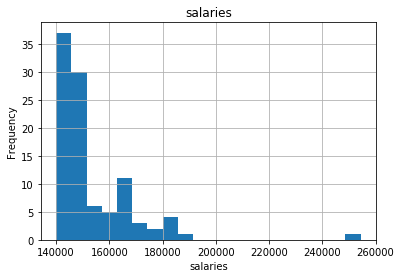

In [71]:
#Generate histograms using the format df.YOUR_CHOICE_OF_COLUMN_NAME.hist(bins=YOUR_CHOICE_OF_BIN_SIZE)

shortForCsv.salary.hist(bins=20)
plt.xlabel('salaries')
plt.ylabel('Frequency')
plt.title('salaries');

plt.show();



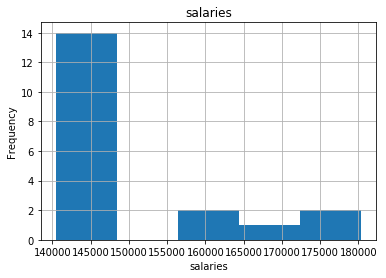

In [72]:

shortForCsv[shortForCsv.gender == "female"].salary.hist(bins=5)
plt.xlabel('salaries')
plt.ylabel('Frequency')
plt.title('salaries');

plt.show();




In [72]:
d_2014.dtypes
print(d_2014.shape)

name                          object
title                         object
dept                          object
salary                       float64
retroactive                  float64
other                        float64
overtime                     float64
injured                      float64
detail                       float64
quinn_education_incentive    float64
totalSalary                  float64
zip_code                      object
firstName                     object
dtype: object

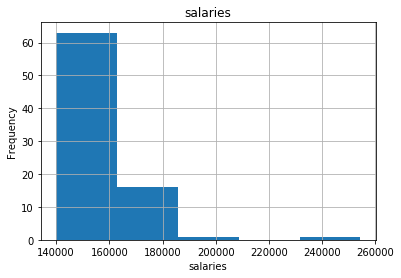

In [73]:
shortForCsv[shortForCsv.gender == "male"].salary.hist(bins=5)
plt.xlabel('salaries')
plt.ylabel('Frequency')
plt.title('salaries');

plt.show();



